In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [4]:
filename = '/Users/palhares/Documents/msc/PTT-PPG-PhysioNet/physionet.org/files/pulse-transit-time-ppg/1.1.0/csv/s2_sit.csv'
column_name = 'pleth_1'


In [5]:
data = pd.read_csv(filename)
X = data[column_name].values.reshape(-1, 1)


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [18]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

In [19]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

/Users/palhares/opt/anaconda3/envs/blood-pressure-estimator/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


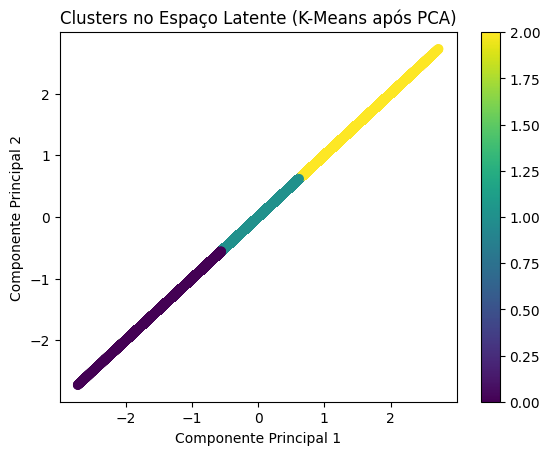

In [21]:
plt.scatter(X_pca[:, 0], X_pca[:, 0], c=cluster_labels, cmap='viridis')
plt.title('Clusters no Espaço Latente (K-Means após PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [8]:
input_layer = Input(shape=(1,))
encoded = Dense(64, activation='relu')(input_layer)
decoded = Dense(1, activation='linear')(encoded)


In [9]:
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [10]:
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True)


Epoch 1/100


2023-10-03 21:59:37.687083: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


7694/7694 [==============================] - 3s 321us/step - loss: 0.0031
Epoch 2/100
7694/7694 [==============================] - 2s 297us/step - loss: 5.4101e-07
Epoch 3/100
7694/7694 [==============================] - 2s 283us/step - loss: 7.9267e-07
Epoch 4/100
7694/7694 [==============================] - 2s 307us/step - loss: 9.9657e-07
Epoch 5/100
7694/7694 [==============================] - 2s 283us/step - loss: 1.1294e-06
Epoch 6/100
7694/7694 [==============================] - 2s 290us/step - loss: 1.1403e-06
Epoch 7/100
7694/7694 [==============================] - 2s 311us/step - loss: 7.1954e-07
Epoch 8/100
7694/7694 [==============================] - 2s 282us/step - loss: 8.2714e-07
Epoch 9/100
7694/7694 [==============================] - 2s 305us/step - loss: 8.5134e-07
Epoch 10/100
7694/7694 [==============================] - 2s 284us/step - loss: 7.8309e-07
Epoch 11/100
7694/7694 [==============================] - 2s 276us/step - loss: 5.7351e-07
Epoch 12/100
7694/7694 [

In [11]:
encoder = Model(input_layer, encoded)
latent_space = encoder.predict(X_scaled)


7694/7694 [==============================] - 2s 206us/step


In [12]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(latent_space)
cluster_labels = kmeans.labels_


/Users/palhares/opt/anaconda3/envs/blood-pressure-estimator/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


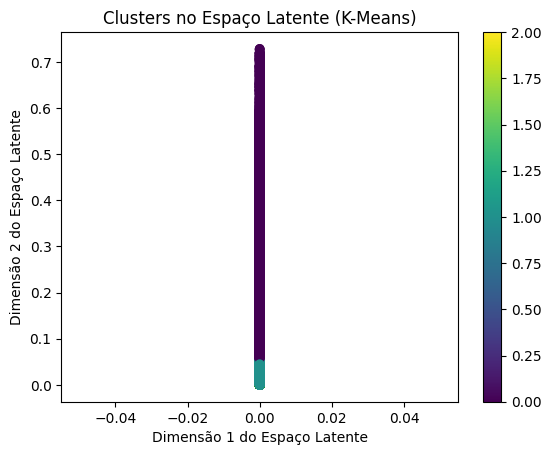

In [15]:
plt.scatter(latent_space[:, 0], latent_space[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clusters no Espaço Latente (K-Means)')
plt.xlabel('Dimensão 1 do Espaço Latente')
plt.ylabel('Dimensão 2 do Espaço Latente')
plt.colorbar()
plt.show()

In [13]:
pca = PCA(n_components=2)
latent_space_2d = pca.fit_transform(latent_space)

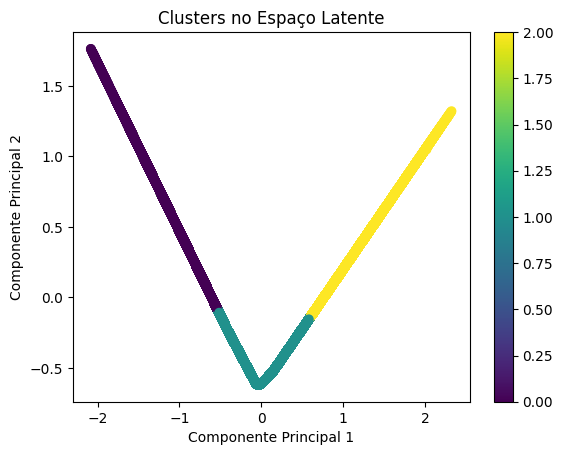

In [14]:
plt.scatter(latent_space_2d[:, 0], latent_space_2d[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Clusters no Espaço Latente')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()